<a href="https://colab.research.google.com/github/bintangnabiil/Deep_Learning/blob/main/Deep_Learning_LSTM_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Model LSTM Tensorflow

##1. Install dan Import Libraries

In [4]:
!pip install scikit-learn --quiet

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization


##2. Load dan Preprocess Dataset

In [5]:
# Setting
tf_num_words = 30000
tf_maxlen = 300

# Load Data IMDb
(tf_x_train, tf_y_train), (tf_x_test, tf_y_test) = imdb.load_data(num_words=tf_num_words)

# Padding
tf_x_train = pad_sequences(tf_x_train, maxlen=tf_maxlen)
tf_x_test = pad_sequences(tf_x_test, maxlen=tf_maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Untuk PyTorch

In [6]:
py_x_train = torch.tensor(tf_x_train, dtype=torch.long)
py_y_train = torch.tensor(tf_y_train, dtype=torch.float32)
py_x_test = torch.tensor(tf_x_test, dtype=torch.long)
py_y_test = torch.tensor(tf_y_test, dtype=torch.float32)

# Dataset & Dataloader
from torch.utils.data import TensorDataset, DataLoader

py_batch_size = 128
py_train_dataset = TensorDataset(py_x_train, py_y_train)
py_test_dataset = TensorDataset(py_x_test, py_y_test)
py_train_loader = DataLoader(py_train_dataset, batch_size=py_batch_size, shuffle=True)
py_test_loader = DataLoader(py_test_dataset, batch_size=py_batch_size)

py_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##3. Model LSTM Tensorflow

In [7]:
tf_model_lstm = Sequential([
    Embedding(input_dim=tf_num_words, output_dim=128, input_length=tf_maxlen),  # <-- tambahkan ini
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    BatchNormalization(),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

tf_model_lstm.build(input_shape=(None, tf_maxlen))
tf_model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 128)       │     3,840,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 300, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,025,729 (15.36 MB)

 Trainable params: 4,025,473 (15.36 MB)

 Non-trainable params: 256 (1.00 KB)

##4. Training Tensorflow

In [8]:
# Kompilasi model
tf_model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Latih model
tf_history_lstm = tf_model_lstm.fit(
    tf_x_train, tf_y_train,
    validation_data=(tf_x_test, tf_y_test),
    epochs=5,
    batch_size=128
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.6535 - loss: 0.5741 - val_accuracy: 0.8546 - val_loss: 0.4232
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.9207 - loss: 0.2215 - val_accuracy: 0.8586 - val_loss: 0.3579
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.9591 - loss: 0.1252 - val_accuracy: 0.8667 - val_loss: 0.3643
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9772 - loss: 0.0778 - val_accuracy: 0.8264 - val_loss: 0.4039
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9787 - loss: 0.0655 - val_accuracy: 0.8619 - val_loss: 0.5001


##5. Plot Akurasi dan Loss

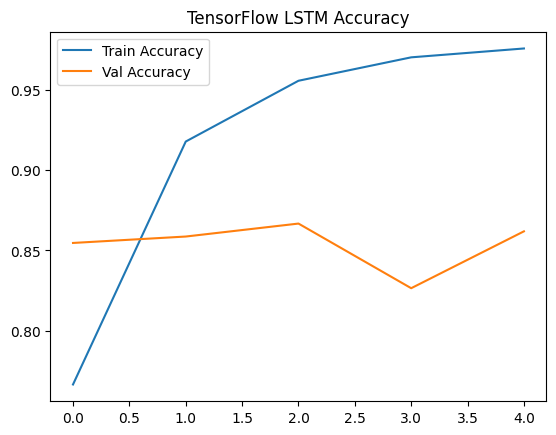

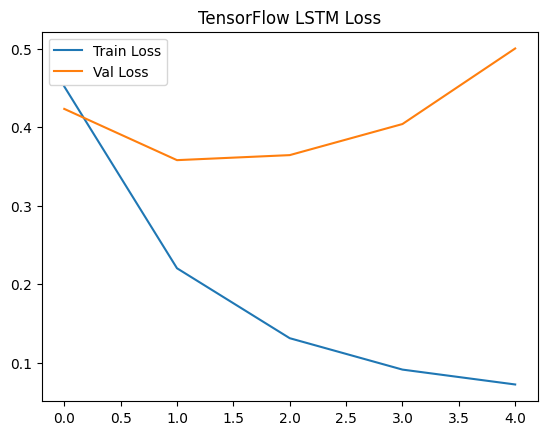

In [9]:
plt.plot(tf_history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(tf_history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.title("TensorFlow LSTM Accuracy")
plt.legend()
plt.show()

plt.plot(tf_history_lstm.history['loss'], label='Train Loss')
plt.plot(tf_history_lstm.history['val_loss'], label='Val Loss')
plt.title("TensorFlow LSTM Loss")
plt.legend()
plt.show()

##6. Evaluasi Matriks

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
📊 TensorFlow Model Evaluation
Akurasi     : 0.8619
Presisi     : 0.8549
Recall      : 0.8718
F1 Score    : 0.8632
AUC Score   : 0.9324


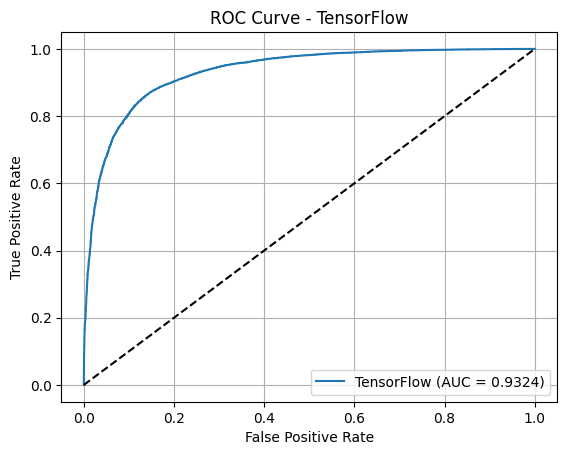

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prediksi probabilitas dan label
tf_y_pred_prob = tf_model_lstm.predict(tf_x_test)
tf_y_pred_label = (tf_y_pred_prob > 0.5).astype("int32")

# Evaluasi metriks
tf_acc = accuracy_score(tf_y_test, tf_y_pred_label)
tf_precision = precision_score(tf_y_test, tf_y_pred_label)
tf_recall = recall_score(tf_y_test, tf_y_pred_label)
tf_f1 = f1_score(tf_y_test, tf_y_pred_label)
tf_auc = roc_auc_score(tf_y_test, tf_y_pred_prob)

# Print hasil
print("📊 TensorFlow Model Evaluation")
print(f"Akurasi     : {tf_acc:.4f}")
print(f"Presisi     : {tf_precision:.4f}")
print(f"Recall      : {tf_recall:.4f}")
print(f"F1 Score    : {tf_f1:.4f}")
print(f"AUC Score   : {tf_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(tf_y_test, tf_y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label="TensorFlow (AUC = {:.4f})".format(tf_auc))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TensorFlow")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#2) Model LSTM PyTorch

##1. Model LSTM PyTorch

In [11]:
import torch
import torch.nn as nn

class PyTorchLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(PyTorchLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm1 = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.dropout1 = nn.Dropout(0.3)
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.dropout2 = nn.Dropout(0.3)
        self.fc1 = nn.Linear(hidden_dim, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        x = x[:, -1, :]  # Ambil output dari time step terakhir
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

##2. Inisialisasi Model

In [12]:
py_vocab_size = 30000
py_embedding_dim = 128
py_hidden_dim = 128

py_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
py_model = PyTorchLSTM(vocab_size=py_vocab_size, embedding_dim=py_embedding_dim, hidden_dim=py_hidden_dim).to(py_device)
py_criterion = nn.BCEWithLogitsLoss()
py_optimizer = torch.optim.Adam(py_model.parameters(), lr=0.001)

##3. Training PyTorch

In [16]:
py_train_losses = []
py_train_accuracies = []

for py_epoch in range(py_num_epochs):
    py_model.train()
    py_total_loss = 0
    py_correct = 0
    py_total = 0

    for py_inputs, py_labels in py_train_loader:
        py_inputs, py_labels = py_inputs.to(py_device), py_labels.to(py_device)

        py_optimizer.zero_grad()
        py_outputs = py_model(py_inputs).squeeze()
        py_loss = py_criterion(py_outputs, py_labels.float())
        py_loss.backward()
        py_optimizer.step()

        py_total_loss += py_loss.item()
        py_preds = torch.round(torch.sigmoid(py_outputs))
        py_correct += (py_preds == py_labels).sum().item()
        py_total += py_labels.size(0)

    py_epoch_loss = py_total_loss / len(py_train_loader)
    py_epoch_acc = py_correct / py_total

    py_train_losses.append(py_epoch_loss)
    py_train_accuracies.append(py_epoch_acc)

    print(f"Epoch {py_epoch+1}: Loss = {py_epoch_loss:.4f}, Accuracy = {py_epoch_acc:.4f}")

Epoch 1: Loss = 0.2960, Accuracy = 0.8839
Epoch 2: Loss = 0.2822, Accuracy = 0.8886
Epoch 3: Loss = 0.2538, Accuracy = 0.9000
Epoch 4: Loss = 0.2102, Accuracy = 0.9192
Epoch 5: Loss = 0.1797, Accuracy = 0.9340


##4. Plot Akurasi dan Loss

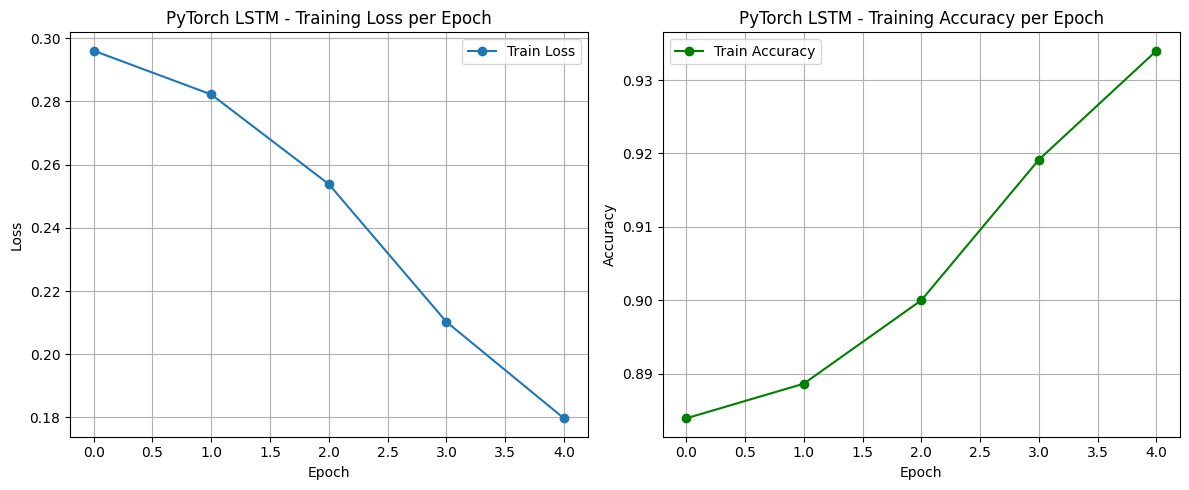

In [17]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(py_train_losses, marker='o', label='Train Loss')
plt.title('PyTorch LSTM - Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(py_train_accuracies, marker='o', color='green', label='Train Accuracy')
plt.title('PyTorch LSTM - Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

##5. Evaluasi Matriks

📊 PyTorch Model Evaluation
Akurasi     : 0.8643
Presisi     : 0.8652
Recall      : 0.8631
F1 Score    : 0.8642
AUC Score   : 0.9349


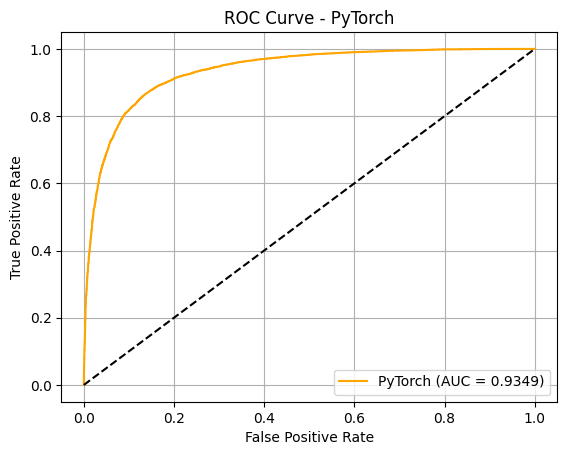

In [18]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

py_model.eval()
py_all_preds = []
py_all_targets = []

with torch.no_grad():
    for py_inputs, py_labels in py_test_loader:
        py_inputs, py_labels = py_inputs.to(py_device), py_labels.to(py_device)
        py_outputs = py_model(py_inputs)
        py_preds = torch.sigmoid(py_outputs).cpu().numpy()
        py_all_preds.extend(py_preds)
        py_all_targets.extend(py_labels.cpu().numpy())

# Konversi dan threshold
py_y_pred_prob = np.array(py_all_preds)
py_y_pred_label = (py_y_pred_prob > 0.5).astype(int)

# Evaluasi
py_acc = accuracy_score(py_all_targets, py_y_pred_label)
py_precision = precision_score(py_all_targets, py_y_pred_label)
py_recall = recall_score(py_all_targets, py_y_pred_label)
py_f1 = f1_score(py_all_targets, py_y_pred_label)
py_auc = roc_auc_score(py_all_targets, py_y_pred_prob)

# Print hasil
print("📊 PyTorch Model Evaluation")
print(f"Akurasi     : {py_acc:.4f}")
print(f"Presisi     : {py_precision:.4f}")
print(f"Recall      : {py_recall:.4f}")
print(f"F1 Score    : {py_f1:.4f}")
print(f"AUC Score   : {py_auc:.4f}")

# ROC Curve
py_fpr, py_tpr, _ = roc_curve(py_all_targets, py_y_pred_prob)
plt.figure()
plt.plot(py_fpr, py_tpr, label="PyTorch (AUC = {:.4f})".format(py_auc), color='orange')
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PyTorch")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#3) Penjelasan Persamaan Matematika
##1. Embedding Layer
Layer ini mengubah integer (index kata) menjadi vektor berdimensi tetap.

Misalnya, kalau kita punya kata indeks $w_i$, maka embedding-nya:
$$
e_i = Embedding(w_i) \in ℝ^d
$$

di mana $d$ adalah embedding.<br><br>

##2. LSTM Layer
Persamaan Matematika: LSTM (Long Short-Term Memory) mengolah input sekuensial dengan memori internal: Untuk setiap waktu t:

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] +b_i)
$$
$$
\overline{C}_t = tanh (W_C \cdot [h_{t-1}, x_t] + b_c)
$$
$$
C_t = f_t * C_{t-1}+i_t*\overline{C}_t
$$
$$
o_t = \sigma (W_o ⋅ [h_{t-1}, x_t] +b_o)
$$
$$
h_t = o_t * tanh(C_t)
$$

Keterangan:
- $f_t$ = forget gate
- $i_t$ = input gat
- $c_t$ = cell gate
- $h_t$ = hidden state
- $\sigma$ = sigmoid activation
- $*$ =  elemen-wise multiplilcation

##3. Dense Layer & Activation
<br><br>
Hidden Layer (ReLU):

$$
h = ReLU(W_1x+b_1)=max(0,W_1x+b_1)
$$

Output Layer (Sigmoid):
$$
\hat{y}=\sigma(W_2h+b_2)=\frac{1}{1+e^{-(W_2h+b_2)}}
$$<br><br>

##4. Dropout
Dropout: Secara matematis dropout pada training akan meng-nol-kan neuron secara acak:
$$
Dropout(x) = x \cdot r, r~ Bernoulli(p)
$$
dengan $p$ adalah probabilitas untuk tetap (keep)<br><br>

##5. Batch Normalisasi
$$
\hat(x) = \frac{x-μ}{\sqrt\sigma^2+ϵ}
$$

##6. Loss Function: Binary Crossentropy
Persamaan Matematika: Untuk label y ∈ {0,1} dan prediksi probabilitas $\hat{y}$:
$$
𝓛(y,\hat{y})=-[y \cdot log(\hat{y})+(1-y) \cdot log(1-\hat{y})]
$$<br><br>

##7. Akurasi
Mengukur seberapa banyak prediksi yang benar dibandingkan total data:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$<br><br>

Di mana:
- $TP (True Positive)$ = Kasus positif yang diprediksi positif
- $TF (True Negative)$ = Kasus negatif yang diprediksi negatif
- $FP (False Positive)$ = Kasus negatif yang salah diprediksi sebagai positif
- $FF (False Negative)$ = Kasus positif yang salah diprediksi sebagai negatif<br><br>

##8. Presisi
$$
Presisi = \frac{TP}{TP + FP}
$$<br><br>

Keterangan:
 - Mengukur seberapa banyak dari yang model prediksi positif, benar-benar positif.
 - Tinggi = sedikit yang salah prediksi sebagai positif.

Cocok saat kamu ingin menghindari false positive, misalnya dalam deteksi spam.<br><br>

##9. Recall (Sensitivity / TPR)
$$
Recall = \frac{TP}{TP + FN}
$$<br><br>

Keterangan:
- Mengukur seberapa banyak dari yang sebenarnya positif, berhasil dideteksi oleh model.
- Tinggi = model jarang melewatkan yang seharusnya positif.

Cocok saat kamu ingin menghindari false negative, misalnya pada deteksi penyakit.<br><br>

##10. F1-Score
$$
F1-Score = 2 \times \frac{Precision×Recall}{Precision+Recall}
$$<br><br>

Keterangan:
- F1 adalah rata-rata harmonis antara presisi dan recall.
- Cocok jika kamu ingin seimbang antara menghindari FP dan FN.

Digunakan saat kamu punya data imbalance dan ingin metrik yang fair.<br><br>

##11. AUC - Area Under Curve (ROC)
ROC Curve adalah grafik antara:
- True Positive Rate (TPR) = Recall
- False Positive Rate (FPR):
<br><br>
$$
FPR = \frac{FP}{FP + TN}
$$
<br><br>
Semakin tinggi AUC, semakin baik model membedakan antara kelas 1 dan kelas 0.
Nilai AUC:
- 0.5 = tebak-tebakan
- 0.7 - 0.8 = oke
- 0.8 - 0.9 = bagus
- 0.9 = sangat bagus